# 3.2  Generar corpus IL SALUD PERIODO

Los títulos asociados a iniciativas legislativas de ley presentan en promedio 21 palabras, maximo 125 palabras y mínimo 2 palabras.

In [1]:
# Importar librerias

from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import pickle
import sweetviz as sv
import sys

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from matplotlib import colormaps

from collections import Counter
from itertools import islice

from tqdm import tqdm
tqdm.pandas()

In [2]:
# Configurar path
load_dotenv() # Cargar las variables de entorno del archivo .env
BASE_DIR =  os.getenv("DIR_BASE")
RESULTADOS_DIR = os.getenv("DIR_DATOS_PROCESADOS") # Acceder a las variables de entorno
sys.path.append(BASE_DIR)
sys.path.append(RESULTADOS_DIR)

pd.set_option('display.max_colwidth', None)

In [3]:
# Abrir
with open(RESULTADOS_DIR + 'base_texto_df_ley_0924.pkl', 'rb') as file: 
    df = pickle.load(file)
df.head()

,Proyecto.ID,Título,Título procesado,Título normalizado,Cant_token,Cant_token_normalizado,Proyecto_girado_a_comisiones_SALUD,Proyecto_SALUD,Resultado,Max_Orden,Tiene_antecedente_por_titulo_proy,Periodo,Año,Tokens
0,HCDN280534,"ANULENSE LOS DECRETOS 1107/2024 Y 1112/2024, SOBRE MODIFICACIONES EN LAS FUNCIONES DE LAS FUERZAS ARMADAS - FFAA -.",anulense los decretos numero numero y numero numero sobre modificaciones en las funciones de las fuerzas armadas ffaa,anulense decreto modificacion funcion fuerza armado ffaa,18,7,0.0,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,3,False,NaN,2024,"[anulense, decreto, modificacion, funcion, fuerza, armado, ffaa]"
1,HCDN280533,DEFENSA DEL CONSUMIDOR - LEY 24240 -. MODIFICACION DEL ARTICULO 8 SOBRE IMAGENES HUMANAS EN PUBLICIDADES.,defensa del consumidor ley numero modificacion del articulo numero sobre imagenes humanas en publicidades,defensa consumidor imagen humano publicidad,16,5,0.0,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,1,False,NaN,2024,"[defensa, consumidor, imagen, humano, publicidad]"
2,HCDN280532,DEFENSA DEL CONSUMIDOR - LEY 24240 -. MODIFICACION DEL ARTICULO 8 BIS SOBRE TRATO DIGNO Y PRACTICAS ABUSIVAS.,defensa del consumidor ley numero modificacion del articulo numero bis sobre trato digno y practicas abusivas,defensa consumidor bis trato digno practica abusivo,18,7,0.0,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,1,False,NaN,2024,"[defensa, consumidor, bis, trato, digno, practica, abusivo]"
3,HCDN280531,CODIGO CIVIL Y COMERCIAL DE LA NACION - LEY 26994 -. MODIFICACIONES SOBRE CONTRATOS DE LOCACION-.,codigo civil y comercial de la nacion ley numero modificaciones sobre contratos de locacion,contrato locacion,16,2,0.0,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,2,False,NaN,2024,"[contrato, locacion]"
4,HCDN280530,CODIGO CIVIL Y COMERCIAL DE LA NACION - LEY 26994 -. MODIFICACION DEL ARTICULO 1098 SOBRE PROTECCION DEL CONSUMIDOR.,codigo civil y comercial de la nacion ley numero modificacion del articulo numero sobre proteccion del consumidor,proteccion consumidor,19,2,0.0,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,2,False,NaN,2024,"[proteccion, consumidor]"


In [ ]:
df.describe()

,Cant_token,Cant_token_normalizado,Proyecto_girado_a_comisiones_SALUD,Proyecto_SALUD,Max_Orden,Periodo,Año
count,35179.000000,35179.000000,35179.000000,35179.000000,35179.000000,33097.000000,35179.000000
mean,21.123682,9.429375,0.127860,0.085761,2.253504,134.111944,2016.586913
std,10.691870,5.019535,0.333939,0.280015,0.822105,4.075721,4.376397
min,2.000000,0.000000,0.000000,0.000000,1.000000,127.000000,2009.000000
25%,14.000000,6.000000,0.000000,0.000000,2.000000,131.000000,2013.000000
50%,19.000000,8.000000,0.000000,0.000000,2.000000,134.000000,2017.000000
75%,27.000000,12.000000,0.000000,0.000000,3.000000,137.000000,2020.000000
max,125.000000,53.000000,1.000000,1.000000,8.000000,141.000000,2024.000000


In [5]:
df[df["Cant_token"]==125]

,Proyecto.ID,Título,Título procesado,Título normalizado,Cant_token,Cant_token_normalizado,Proyecto_girado_a_comisiones_SALUD,Proyecto_SALUD,Resultado,Max_Orden,Tiene_antecedente_por_titulo_proy,Periodo,Año,Tokens
32542,HCDN114854,"CREACION DEL FONDO PARA EL INGRESO CIUDADANO DE LA NIÑEZ (FINCINI), EL CUAL SERA ADMINISTRADO POR LA ANSES; DEROGACION DE LOS INCISOS H), K), W), E Y) DEL ARTICULO 20 DE LA LEY 20628 DE IMPUESTO A LAS GANANCIAS, TO DECRETO 649/97 Y MODIFICATORIAS; DEROGAR DE LA LEY 24714, SUS LEYES Y DECRETOS MODIFICATORIOS DE AQUELLOS BENEFICIOS RELACIONADOS DIRECTAMENTE CON LA NIÑEZ Y DISCAPACIDAD; MODIFICACION DE LOS ARTICULOS 1(REGIMEN DE ASIGNACION FAMILIAR), 5 (FINANCIAMIENTO), 6 (PRESTACIONES) DE LA LEY 24714 Y SUS MODIFICATORIAS; SUSTITUCION DE LOS ARTICULOS 23 (DEDUCCION DE GANANCIAS NETAS) Y 104 (PARTICIPACION DEL FINCINI EN LA DISTRIBUCION DE LO RECAUDADO POR EL IMPUESTO A LAS GANANCIAS) DE LA LEY 20628 DE LA LEY DE IMPUESTO A LAS GANANCIAS, TO POR DECRETO 649/97",creacion del fondo para el ingreso ciudadano de la ninez fincini el cual sera administrado por la anses derogacion de los incisos h k w e y del articulo numero de la ley numero de impuesto a las ganancias to decreto numero numero y modificatorias derogar de la ley numero sus leyes y decretos modificatorios de aquellos beneficios relacionados directamente con la ninez y discapacidad modificacion de los articulos numero regimen de asignacion familiar numero financiamiento numero prestaciones de la ley numero y sus modificatorias sustitucion de los articulos numero deduccion de ganancias netas y numero participacion del fincini en la distribucion de lo recaudado por el impuesto a las ganancias de la ley numero de la ley de impuesto a las ganancias to por decreto numero numero,creacion fondo ingreso ciudadano ninez fincini serar administrar anses derogacion inciso articulo ley decreto modificatoria derogar ley ley decreto modificatorio beneficio relacionado directamente ninez discapacidad regimen asignacion familiar financiamiento prestacion ley modificatoria sustitucion articulo deduccion ganancia neto participacion fincini distribucion recaudado ley ley decreto,125,44,1.0,1.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,3,False,128.0,2010,"[creacion, fondo, ingreso, ciudadano, ninez, fincini, serar, administrar, anses, derogacion, inciso, articulo, ley, decreto, modificatoria, derogar, ley, ley, decreto, modificatorio, beneficio, relacionado, directamente, ninez, discapacidad, regimen, asignacion, familiar, financiamiento, prestacion, ley, modificatoria, sustitucion, articulo, deduccion, ganancia, neto, participacion, fincini, distribucion, recaudado, ley, ley, decreto]"


In [6]:
# Seleccionando IL de Salud
df = df[df['Proyecto_SALUD']==1]
print("Conj. de datos de proyecto_SALUD con Nan en Período:",df.shape)
df = df[~df['Periodo'].isna()]
print("Conj. de datos de proyecto_SALUD sin Nan en Período:",df.shape)

Conj. de datos de proyecto_SALUD con Nan en Período: (3017, 14)
Conj. de datos de proyecto_SALUD sin Nan en Período: (2848, 14)


In [7]:
df = df[~(df['Título normalizado']==" ")]
print("Conj. de datos de proyecto_SALUD sin título vacio:",df.shape)

Conj. de datos de proyecto_SALUD sin título vacio: (2848, 14)


La selección de períodos de cada 5 años se basa a los periodos de presidencia. Es importante tener en cuenta a la hora de comparar el año 2020, dado que fue el año de inicio de pandemía covid 19, en donde se priorizaron proyectos de salud más que en los otros años. Ver notebook de EDA

* Periodo: 10 de diciembre de 2023 al presente
  Presidente Javier Milei
Ministro de Defensa
Dr. Luis Alfonso Petri

* Periodo: 10 de agosto de 2021 al 10 de diciembre de 2023
Presidente Alberto Fernández
Ministro de Defensa
Lic. Jorge Enrique Taiana

* Periodo: 10 de diciembre de 2019 al 10 de Agosto 2021
Presidente Alberto Fernández
Ministro de Defensa
Ing. Agustín Oscar Rossi

* Periodo: 10 de diciembre de 2015 al 10 de diciembre de 2019
Presidente Mauricio Macri
Ministro de Defensa
Ing. Julio César Martínez – 2015-2017
Dr. Oscar Raúl Aguad – 2017 al 2019

* Periodo: 10 de diciembre de 2011 al 10 de diciembre de 2015
Presidenta Cristina Fernández de Kirchner. Re-elección
Ministro de Defensa
Ing. Agustín Oscar Rossi – 2013 - 2015
Arturo Puricelli – 2011 - 2013

* Periodo: 10 de diciembre de 2007 al 10 de diciembre de 2011
Presidenta Cristina Fernández de Kirchner
Ministro de Defensa
Arturo Puricelli – 2010 - 2011
Nilda Garré – 2007 - 2010

## Cargar Corpus para los tres períodos

In [8]:
df['Periodo_5anios'] = 2009
df.loc[(df['Año']>=2014) & (df['Año']<2019), 'Periodo_5anios'] =  2014
df.loc[(df['Año']>=2019), 'Periodo_5anios'] =  2019

In [9]:
df[['Periodo', 'Año','Periodo_5anios']].describe(include='all')

,Periodo,Año,Periodo_5anios
count,2848.000000,2848.000000,2848.000000
mean,134.391152,2016.415028,2014.509129
std,4.093235,4.105452,3.987237
min,127.000000,2009.000000,2009.000000
25%,131.000000,2013.000000,2009.000000
50%,135.000000,2017.000000,2014.000000
75%,138.000000,2020.000000,2019.000000
max,141.000000,2024.000000,2019.000000


In [10]:
df['Periodo_5anios'].value_counts() # frecuencia absoluto

Periodo_5anios
2019    1065
2014    1008
2009     775
Name: count, dtype: int64

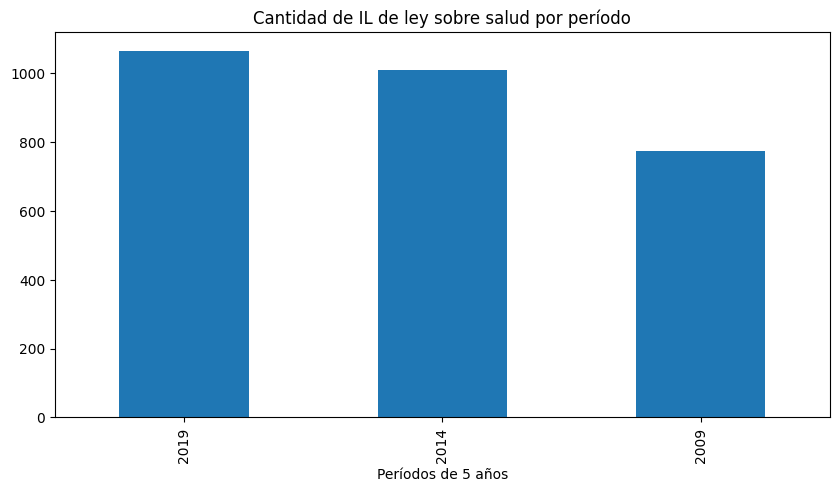

In [11]:
import matplotlib.ticker as ticker
sns.color_palette("pastel")

f, ax = plt.subplots(1, 1, figsize=(10, 5))
df['Periodo_5anios'].value_counts().plot.bar(ax=ax)
ax.set_title('Cantidad de IL de ley sobre salud por período')
ax.set_xlabel("Períodos de 5 años")
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, nbins=15))
plt.savefig(BASE_DIR+"imagenes/evolucion_IL_periodo.png")
plt.show()

In [ ]:
#concatenando titulos IL
PER5anios_df = df.groupby('Periodo_5anios')['Título normalizado'].progress_apply('.'.join).reset_index() 
PER5anios_df['corpus']= PER5anios_df['Título normalizado'].progress_apply(lambda x: [sent.split() for sent in x.split('.')])
PER5anios_df['corpus'] = PER5anios_df['corpus'].progress_apply(lambda x: [token.remove(' ') if ' ' in token else token  for token in x ])


100%|██████████| 3/3 [00:00<00:00, 3003.80it/s]


In [15]:
print(len(PER5anios_df['corpus'].values[0]))
PER5anios_df['corpus'].values[0]

775


[['paro',
  'cardiorrespiratorio',
  'espectaculo',
  'publico',
  'futbol',
  'regimen',
  'presupuesto',
  'minimo',
  'necesario',
  'materia',
  'prevencion',
  'atencion',
  'primaria',
  'basica'],
 ['ministerio',
  'salud',
  'nacion',
  'registro',
  'universal',
  'sanitario',
  'nacional'],
 ['incorporacion',
  'calendario',
  'nacional',
  'vacunacion',
  'dosis',
  'vacuna',
  'varicela',
  'caracter',
  'obligatorio'],
 ['atencion',
  'medica',
  'investigacion',
  'clinico',
  'epidemiologico',
  'capacitacion',
  'profesional',
  'deteccion',
  'diagnostico',
  'difusion',
  'tratamiento',
  'alergia',
  'alimentario',
  'declaracion',
  'inter',
  'nacional'],
 ['ley', 'tabaco', 'paquete', 'envase', 'producto', 'elaborado', 'tabaco'],
 ['pesquisa',
  'neonatal',
  'incorporacion',
  'diverso',
  'estudio',
  'recien',
  'nacido'],
 ['control',
  'sanitario',
  'personal',
  'embarcacion',
  'amarrir',
  'suelo',
  'argentino',
  'proveniente',
  'puerto',
  'extranjero'

In [16]:
# GUARDAR OBJETO PARA DETECTAR CAMBIOS SEMANTICOS
with open(RESULTADOS_DIR + 'periodo_5anios_df.pkl', 'wb') as file: 
    pickle.dump(PER5anios_df,file)

## Analizando frecuencias de palabras por período 
Se tiene en cuenta los períodos parlamentaríos


In [17]:
freqs_list = []
for anios5 in PER5anios_df['Periodo_5anios'].to_list():

    print(anios5)
    subdf = PER5anios_df.loc[(PER5anios_df['Periodo_5anios']==anios5),]
    subdf['Título normalizado'] = subdf['Título normalizado'].str.replace("."," ")                                 
    
    freqs = Counter()
    subdf['Título normalizado'].apply(lambda x: freqs.update(x.split())) # cualquier espacio.
    total_number = sum(freqs.values())
    print('Número total de tokens:', total_number)

    freqs_df = pd.DataFrame.from_dict(freqs, orient='index',
                                      columns=['Frecuencia'])
    freqs_df = freqs_df.reset_index()

    freqs_df = freqs_df.rename(columns={'index': 'Palabra'})
    mask = (freqs_df['Palabra'].str.len() > 1)
    print(freqs_df.shape)
    freqs_df = freqs_df.loc[mask]
    print(freqs_df.shape)
    print('Entradas removidas de 1 carácter.')
    print('Cantidad de tokens únicos:', freqs_df.shape[0])

    freqs_df = freqs_df.sort_values('Frecuencia').reset_index(drop=True)

    freqs_df['Porcentaje'] = freqs_df['Frecuencia'] / total_number

    
    freqs_df.to_csv(RESULTADOS_DIR+'./archivos_out/frec_para_datos_limpios_por_desplaz_semantico_anios5_'+str(anios5)+'.csv', index=False)

    freqs_df['Período'] = str(anios5)
    
    freqs_list.append(freqs_df)
    

2009
Número total de tokens: 7652
(1713, 2)
(1713, 2)
Entradas removidas de 1 carácter.
Cantidad de tokens únicos: 1713
2014
Número total de tokens: 9494
(1967, 2)
(1967, 2)
Entradas removidas de 1 carácter.
Cantidad de tokens únicos: 1967
2019
Número total de tokens: 9881
(1875, 2)
(1875, 2)
Entradas removidas de 1 carácter.
Cantidad de tokens únicos: 1875


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12568\3633415219.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['Título normalizado'] = subdf['Título normalizado'].str.replace("."," ")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12568\3633415219.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['Título normalizado'] = subdf['Título normalizado'].str.replace("."," ")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12568\3633415219.py:6: SettingWithCopyWarning: 
A value is trying to be set on

In [18]:
freqs_df = pd.concat(freqs_list) # Dataframe de frecuecias

In [19]:
freqs_df.head(2)

,Palabra,Frecuencia,Porcentaje,Período
0,paro,1,0.000131,2009
1,ipod,1,0.000131,2009


In [20]:
freqs_df = freqs_df.sort_values(by = 'Frecuencia', ascending =False)

##### Top 10 frecuencia de palabra por período de 5 años

In [22]:
freqs_df.head(10).Palabra.unique() # Palabras

array(['nacional', 'creacion', 'regimen', 'salud'], dtype=object)

In [23]:
freqs_df.head(10)

,Palabra,Frecuencia,Porcentaje,Período
1874,nacional,256,0.025908,2019
1873,creacion,215,0.021759,2019
1966,nacional,203,0.021382,2014
1965,regimen,202,0.021277,2014
1872,salud,195,0.019735,2019
1871,regimen,177,0.017913,2019
1964,creacion,176,0.018538,2014
1712,nacional,169,0.022086,2009
1963,salud,155,0.016326,2014
1711,creacion,135,0.017642,2009


##### Las menos 10 frecuencia de palabra por período de 5 años

In [24]:
freqs_df.tail(10).Palabra.unique()

array(['querido', 'compania', 'electrohipersensibilidad', 'pedro',
       'optativo', 'estatal', 'gobierno', 'surgido', 'quirugico', 'paro'],
      dtype=object)

In [25]:
freqs_df.tail(10)

,Palabra,Frecuencia,Porcentaje,Período
64,querido,1,0.000101,2019
65,compania,1,0.000101,2019
66,electrohipersensibilidad,1,0.000101,2019
67,pedro,1,0.000101,2019
68,optativo,1,0.000101,2019
69,estatal,1,0.000101,2019
70,gobierno,1,0.000101,2019
71,surgido,1,0.000101,2019
72,quirugico,1,0.000101,2019
0,paro,1,0.000131,2009


In [26]:
freqs_df.describe(include = 'all') 

,Palabra,Frecuencia,Porcentaje,Período
count,5555,5555.000000,5555.000000,5555
unique,3220,NaN,NaN,3
top,nacional,NaN,NaN,2014
freq,3,NaN,NaN,1967
mean,NaN,4.865347,0.000540,NaN
std,NaN,12.400641,0.001363,NaN
min,NaN,1.000000,0.000101,NaN
25%,NaN,1.000000,0.000105,NaN
50%,NaN,2.000000,0.000202,NaN
75%,NaN,4.000000,0.000405,NaN


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Frecuencia', ylabel='Count'>

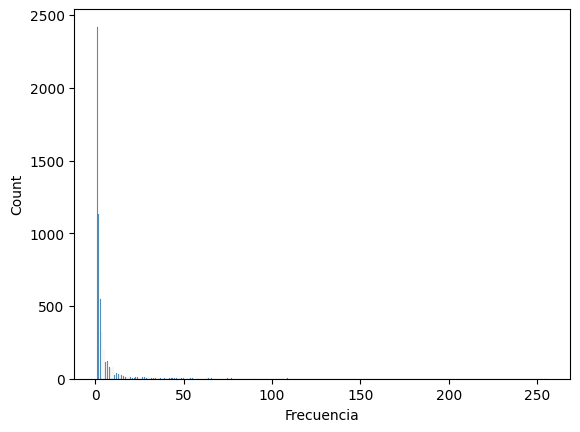

In [28]:
sns.histplot(x = 'Frecuencia', data=freqs_df, bins='auto') # hue='Período'

<Axes: xlabel='Frecuencia'>

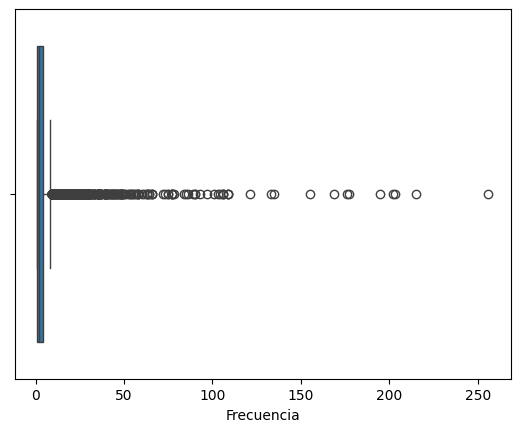

In [29]:
sns.boxplot(x = 'Frecuencia', data=freqs_df)

In [30]:
def eliminar_outliers_iqr(df, columna):
    """
    Separa los outliers y devuelve dos DataFrames:
    - df_limpio: sin outliers
    - df_outliers: con los valores atípicos detectados

    Parámetros:
    df (pd.DataFrame): DataFrame de pandas
    columna (str): Nombre de la columna a analizar

    Retorna:
    df_limpio (pd.DataFrame): DataFrame sin outliers
    df_outliers (pd.DataFrame): DataFrame solo con outliers
    """
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    print("Q1:",Q1)
    print("Q3:",Q3)
    print('limite_inferior:', limite_inferior)
    print('limite_superior:', limite_superior)


    # Filtrar datos
    df_limpio = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    df_outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

    return df_limpio, df_outliers    


In [31]:
# Detectar outliers
freqs_limpio_df , outliers_df = eliminar_outliers_iqr(freqs_df, 'Frecuencia')
display("Outliers detectados:\n", outliers_df)

Q1: 1.0
Q3: 4.0
limite_inferior: -3.5
limite_superior: 8.5


'Outliers detectados:\n'

,Palabra,Frecuencia,Porcentaje,Período
1874,nacional,256,0.025908,2019
1873,creacion,215,0.021759,2019
1966,nacional,203,0.021382,2014
1965,regimen,202,0.021277,2014
1872,salud,195,0.019735,2019
...,...,...,...,...
1549,victima,9,0.001176,2009
1550,terapia,9,0.001176,2009
1551,tipo,9,0.001176,2009
1552,monto,9,0.001176,2009


In [32]:
print("Cantidad de palabras por período que superan las 8 veces - OUTLIERS:", len(outliers_df.Palabra.unique()))

Cantidad de palabras por período que superan las 8 veces - OUTLIERS: 315


In [36]:
outliers_df.describe(include='all')

,Palabra,Frecuencia,Porcentaje,Período
count,617,617.000000,617.000000,617
unique,315,NaN,NaN,3
top,nacional,NaN,NaN,2019
freq,3,NaN,NaN,222
mean,NaN,26.273906,0.002907,NaN
std,NaN,29.115107,0.003186,NaN
min,NaN,9.000000,0.000911,NaN
25%,NaN,11.000000,0.001214,NaN
50%,NaN,16.000000,0.001720,NaN
75%,NaN,29.000000,0.003265,NaN


In [33]:
p99 = freqs_df['Frecuencia'].quantile(0.99)
print('Perceptil 99% de Frecuencia:', p99)
display(outliers_df[outliers_df['Frecuencia']> p99].sort_values('Porcentaje', ascending=False))

Perceptil 99% de Frecuencia: 54.460000000000036


,Palabra,Frecuencia,Porcentaje,Período
1874,nacional,256,0.025908,2019
1712,nacional,169,0.022086,2009
1873,creacion,215,0.021759,2019
1966,nacional,203,0.021382,2014
1965,regimen,202,0.021277,2014
1872,salud,195,0.019735,2019
1964,creacion,176,0.018538,2014
1871,regimen,177,0.017913,2019
1711,creacion,135,0.017642,2009
1710,salud,133,0.017381,2009


<Axes: xlabel='Frecuencia'>

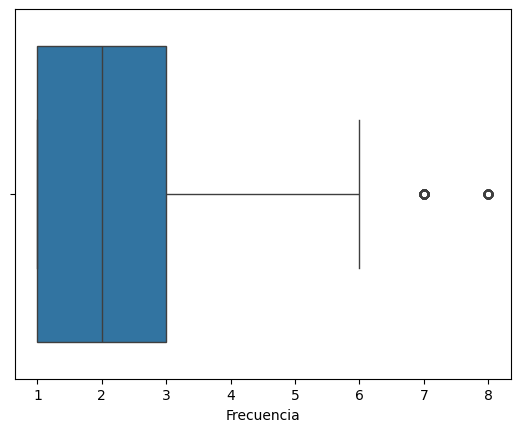

In [34]:
# Miramos distribución sin outliers
sns.boxplot(x = 'Frecuencia', data=freqs_limpio_df)

<Axes: xlabel='Frecuencia', ylabel='Count'>

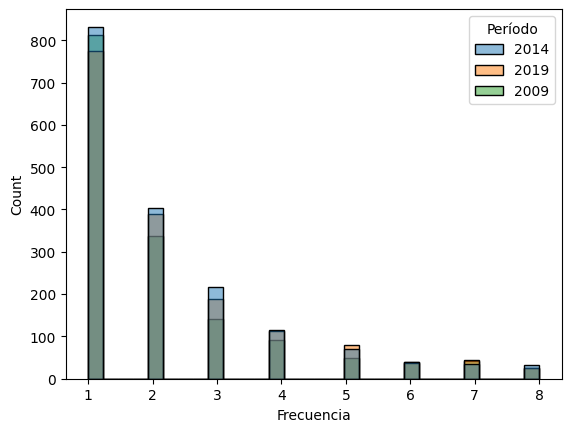

In [35]:
sns.histplot(x = 'Frecuencia', data=freqs_limpio_df,  hue='Período') 

Analizando proyectos de IL de Salud:
* [2009 - 2014) 
    * Número total de tokens: 7652
    * Número de tokens únicos: 1713
* [2014 - 2019)
    * Número total de tokens: 9494
    * Número de tokens únicos: 1967
* [2019 - 2024)
    * Número total de tokens: 9881
    * Número de tokens únicos: 1875


**Corpus IL:**
* Las palabras aparecen pocas veces. Esto afectará el aprender del modelo. Embeddings inestables, esto afecta la detección de cambios semánticos.
  
* Esto afecta tareas posteriores
    * Analizando las frecuencia de token por período:
        * 2 veces es la mediana de veces en que aparece un token por periodo.
        * 5 veces es el promedio de veces en que aparece un token por periodo.
        * Cuartil 3 de Frecuencia = 8.5 
        * 315 palabras con frecuencias extremas